# Linear Regression
Some of my notes on single and multivariate regression

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance 
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

sns.set_style('dark')
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category = FutureWarning)
%matplotlib inline


# PART 0: Data Preparation

In [2]:
##Retrieve full dataset
df_full = pd.read_csv('cleaned_datasets/NTD_data_per_country_cleaned.csv')
df_full.sample(3)

,Unnamed: 0,Country,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Age dependency ratio, old","Age dependency ratio, young","Birth rate, crude (per 1,000 people)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)","Cause of death, by injury (% of total)","Cause of death, by non-communicable diseases (% of total)",Current health expenditure (% of GDP),Current health expenditure per capita (current US$),"Current health expenditure per capita, PPP (current international $)","Death rate, crude (per 1,000 people)",Domestic general government health expenditure (% of GDP),Domestic general government health expenditure (% of current health expenditure),Domestic general government health expenditure (% of general government expenditure),Domestic general government health expenditure per capita (current US$),"Domestic general government health expenditure per capita, PPP (current international $)",Domestic private health expenditure (% of current health expenditure),Domestic private health expenditure per capita (current US$),"Domestic private health expenditure per capita, PPP (current international $)","Fertility rate, total (births per woman)","GNI per capita, Atlas method (current US$)","Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, Hib3 (% of children ages 12-23 months)","Immunization, Pol3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Incidence of tuberculosis (per 100,000 people)","Labor force, female (% of total labor force)","Labor force, total","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)","Mortality rate, infant (per 1,000 live births)","Mortality rate, neonatal (per 1,000 live births)","Mortality rate, under-5 (per 1,000)",Number of infant deaths,Number of neonatal deaths,Number of under-five deaths,Out-of-pocket expenditure (% of current health expenditure),Out-of-pocket expenditure per capita (current US$),"Out-of-pocket expenditure per capita, PPP (current international $)",Prevalence of anemia among children (% of children under 5),Prevalence of anemia among non-pregnant women (% of women ages 15-49),Prevalence of anemia among pregnant women (%),Prevalence of anemia among women of reproductive age (% of women ages 15-49),Prevalence of overweight (% of adults),"Prevalence of overweight, female (% of female adults)","Prevalence of overweight, male (% of male adults)",Sex ratio at birth (male births per female births),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)","Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)","Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)","Tuberculosis case detection rate (%, all forms)","Tuberculosis death rate (per 100,000 people)",Tuberculosis treatment success rate (% of new cases),"Unemployment, female (% of female labor force)","Unemployment, male (% of male labor force)","Unemployment, total (% of total labor force)",ISO-alpha3 code_x,Year,cases of visceral leishmaniasis,Status of endemicity of cutaneous leishmaniasis 2017,ISO-alpha3 code_y,Buruli cases 2016,ISO-alpha3 code_x.1,Cases of cholera 2016,Cholera deaths 2016,Unnamed: 0.1,Oncho Status 2018,ISO-alpha3 code_y.1,Oncho cases 2016,Trachoma Operations 2018,Trachoma Pop at Risk 2018,Country code_x,Population requiring PC for STH Pre-SAC,National coverage Pre-SAC,Po

In [3]:
##Get a subset of interesting columns
col_subset = ['Country',
 'Fertility rate, total (births per woman)',
 'GNI per capita, Atlas method (current US$)',
 'Domestic general government health expenditure (% of GDP)',
 'Life expectancy at birth, total (years)',
 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
 'Death rate, crude (per 1,000 people)',
 'Mortality rate, under-5 (per 1,000)',
 'Incidence of tuberculosis (per 100,000 people)',
 'Prevalence of anemia among children (% of children under 5)',
 'cases of visceral leishmaniasis',
 'Status of endemicity of cutaneous leishmaniasis 2017',
 'Buruli cases 2016',
 'Cases of cholera 2016',
 'Cholera deaths 2016',
 'Oncho Status 2018',
 'Oncho cases 2016',
 'Trachoma Operations 2018',
 'Trachoma Pop at Risk 2018',
#  'Population requiring PC for STH Pre-SAC',
#  'National coverage Pre-SAC',
#  'Population requiring PC for STH SAC',
 'National coverage SAC',
#  'Population requiring PC for SCH annually',
#  'Reported number of SAC treated for Schisto',
#  'Age group',
 'National coverage Schisto tmt'
]

rename_cols = {
    'Fertility rate, total (births per woman)':'Births per woman',
    'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)':'Percent deaths due to preventable disease',
    'GNI per capita, Atlas method (current US$)':'GNI per cap USD',
    'Domestic general government health expenditure (% of GDP)':'Govt health expend as percent GDP',
    'Life expectancy at birth, total (years)':'Life expectancy',
    'Mortality rate, under-5 (per 1,000)':'Under 5 Mort rate per 1000',
    'Prevalence of anemia among children (% of children under 5)':'Percent of children under 5 w anemia',
    'Death rate, crude (per 1,000 people)':'Crude death rate per thousand',
    'Incidence of tuberculosis (per 100,000 people)':'TB incidence per 100000',
    'Status of endemicity of cutaneous leishmaniasis 2017':'Cut leishm status 2017',
    'National coverage SAC':'National PC coverage SAC for STH'
              }

In [4]:
df1 = df_full[col_subset]
df1.rename(columns=rename_cols, inplace=True)

C:\Users\shann\Anaconda3\envs\thesis\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [187]:
# #How many nulls?
# df1.isnull().sum()


# PART I: Linear Regression
Perhaps the most commonly applied supervised machine learning technique is linear regression. This method is commonly used by data scientists to predict values from a set of input data. Here, I'll use some data I compiled from the United Nations and World Bank to make an example where we predict a country's Life Expectancy from features such as "Births per woman" and "Percent of children <5 with anemia". 

#### Linear Regression Steps:
1. Prepare data/visualize it 
 - make sure that a linear relationship exists! Use scattar plotting
2. divide into attributes and labels
3. Split into 80% train and 20% test data
4. Fit model on the training data
5. See how well it performed

## Step 1. Prepare data/visualize it
- Check that a linear relationship exists!

 One option is to use a a scatter plot (shown below - a regression plot)

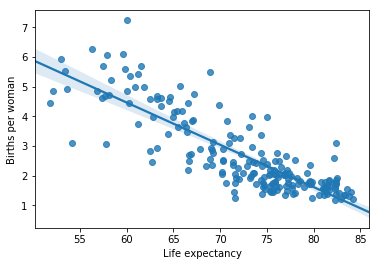

In [6]:
sns.regplot(x='Life expectancy', y='Births per woman', data=df1,x_jitter=.05)
# Canadd some random noise (“jitter”) to the discrete values to make the distribution of those values more clear. 
# Note that jitter is applied only to the scatterplot data and does not influence the regression line fit 

Another option is to use a **join plot** to get a better feel for the distribution of points

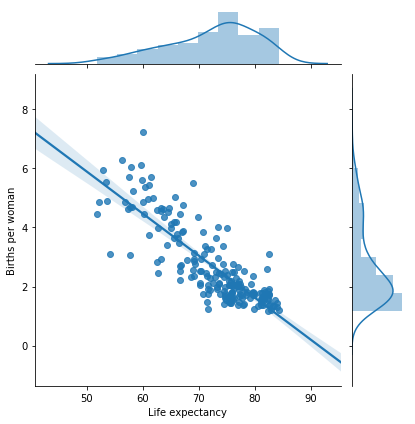

In [9]:
sns.jointplot(x='Life expectancy', y='Births per woman', data=df1, kind="reg");

From this initial plotting exercise, we can be pretty sure that a linear relationship exists



## Step 2. Divide into attributes and labels
#### Independent variables
- AKA **attributes** or inputs

#### Dependent variable 
- AKA **labels** or **target** or outputs
- dependent variables whose values are to be predicted (X)

In [10]:
dataframe2 = df1.dropna(subset=['Life expectancy','Births per woman'])

In [11]:
X = dataframe2['Life expectancy'].values.reshape(-1,1)
y = dataframe2['Births per woman'].values.reshape(-1,1)

## Step 3. Split into 80% train and 20% test data
Next, we split 80% of the data to the training set while 20% of the data to test set using below code.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Step 4. Fit model on the training data
After splitting the data into training and testing sets, finally, the time is to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.

In [13]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Step 5. See how well it performed
To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.

In [14]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

# interpretation: This means that for every one unit of change in independent (Y) variable,
# the change in the dependent (X) is about <regressor coeff>%.

[12.88955317]
[[-0.14063706]]


In [15]:
y_pred = regressor.predict(X_test)

Now compare the actual output values for X_test with the predicted values, execute the following script:

In [16]:
df_output = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_output.head()

,Actual,Predicted
0,4.977,4.323771
1,4.532,3.820431
2,1.610,1.320954
3,2.730,2.721493
4,1.482,2.299160


We can also visualize comparison result as a bar graph using the below script :

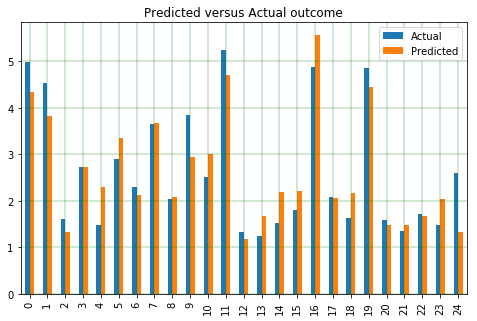

In [56]:
df_result = df_output.head(25)
df_result.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.35', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.35', color='grey')
plt.title('Predicted versus Actual outcome')  
plt.show()

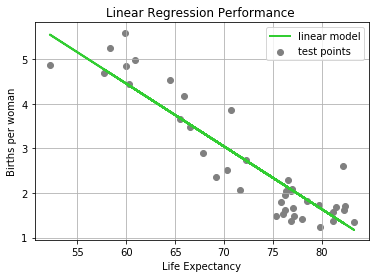

In [54]:
plt.scatter(X_test, y_test,  color='gray', label='test points')
plt.plot(X_test, y_pred, color='limegreen', linewidth=2, label ='linear model')
plt.title('Linear Regression Performance ')  
plt.xlabel('Life Expectancy')  
plt.ylabel('Births per woman')  
plt.legend()
plt.grid(True)
plt.show()

## Evaluate Performance
Lastly, we want to know how well the linear model serves as a good predictor for future values. There are three popular metrics (MAE, MSE, RMSE) for evaluating how well the algorithm fit the data. The choice of which metric to use depends on the particular application and your objectives - often, using more than one metric is useful. 

**Is the model a good fit?** At the very least, your model should be a better predictor than just using the mean value to estimate future trends. If your regression model fits well, its predictions should be close to the actual data values. 

#### Mean Absolute Error (MAE)
Take the absolute value of how far off each residual was and average them. This gives you the **Mean Absolute Error (MAE)**, which is probably the easiest of the regression error metrics to understand. If you have a MAE of 0, then your model is a perfect predictor (unlikely). 

We use the absolute value so that negative and positive values do not cancel out during the calculation. A disadvantage of this technique is that because all of the residuals are weighted equally when taking the average, we can't distinguish between a case where all the model predictions are of by a tiny bit versus a model where only some points are off by a large amount. 

#### Mean Squared Error (MSE)
Mean Squared Error (MSE) is similar to MAE, except each residual is squared. Thus, MSE gives the variance of the error values (telling you how widely dispersed the errors are). By getting the square of the difference between predicted and actual, models with greater dispersion are penalized more.

#### Root Mean Squared Error(RMSE)
Like other metrics for assessing the performance of your linear regression model, RMSE measures how far the actual data points are from your regression line. What differentiates RMSE from MAE is that it is the **square root of the variance** of the residuals, which means that higher error values are penalized more. MAE weighs all the error the same, so a scenario where you have lots of data points off by a tiny bit could end up having the same MAE as a scenario where you have a just few data points off by a huge amount. Depending on your application, you may now want this (i.e. prefer to penalize the model with a few really large errors more) and so RMSE would be prefereable. By using RMSE, you can get an idea of how spread out your prediction errors are. 

A useful characteristic of RMSE is that the result is in the **same units as the response variable**, unlike MSE which gives the result in reponse units squared.

Your overall goal is to **achieve the lowest value for RMSE** that you can. When the RMSE is sufficently low, you can say that the model is useful for predicting the response. 

In [71]:
print('The MAE is:', metrics.mean_absolute_error(y_test, y_pred))  
print('The MSE is:', metrics.mean_squared_error(y_test, y_pred))  
print('The RMSE is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('   Since the mean is', np.mean(y_test), 'your RMSE should probably be below', 0.1*np.mean(y_test))

The MAE is: 0.4135398094503855
The MSE is: 0.2745422485950719
The RMSE is: 0.5239677934711942
   Since the mean is 2.659325 your RMSE should probably be below 2.9252575


Can also use statsmodels to get statistical info of regression performance. 

In [43]:
# with statsmodels
import statsmodels.api as sm

stat_model = sm.OLS(y_train, X_train).fit()
stat_predictions = stat_model.predict(X_train) 
 
print_stat_model = stat_model.summary()
print(print_stat_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     438.1
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           2.05e-47
Time:                        23:27:59   Log-Likelihood:                -297.00
No. Observations:                 159   AIC:                             596.0
Df Residuals:                     158   BIC:                             599.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0359      0.002     20.931      0.0

Another strategy is to plot the residuals - the following `residplot()` should show no underlying structure (i.e. points should be disperesed randomly around zero. 

The residplot() function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. 
- Ideally, these values should be randomly scattered around y = 0
- If there is structure in the residuals, it suggests that simple linear regression is not appropriate

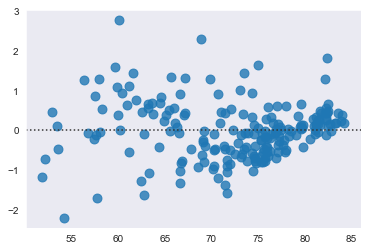

In [80]:
sns.residplot(x=X, y=y, data=dataframe2, scatter_kws={"s": 80});

#not a very good fit here because there does seem to be some underlying pattern

# PART II: Multiple Linear Regression

### Step 1. Prepare / visualize data

In [81]:
multiple_dataset = df1.fillna(method='ffill')
# dataset.isnull().any()
smaller_dataset = multiple_dataset[['Life expectancy','Births per woman', 
                          # 'GNI per cap USD', ##doesn't look linear
                           'Govt health expend as percent GDP', 
                        'TB incidence per 100000', 'Percent of children under 5 w anemia']]

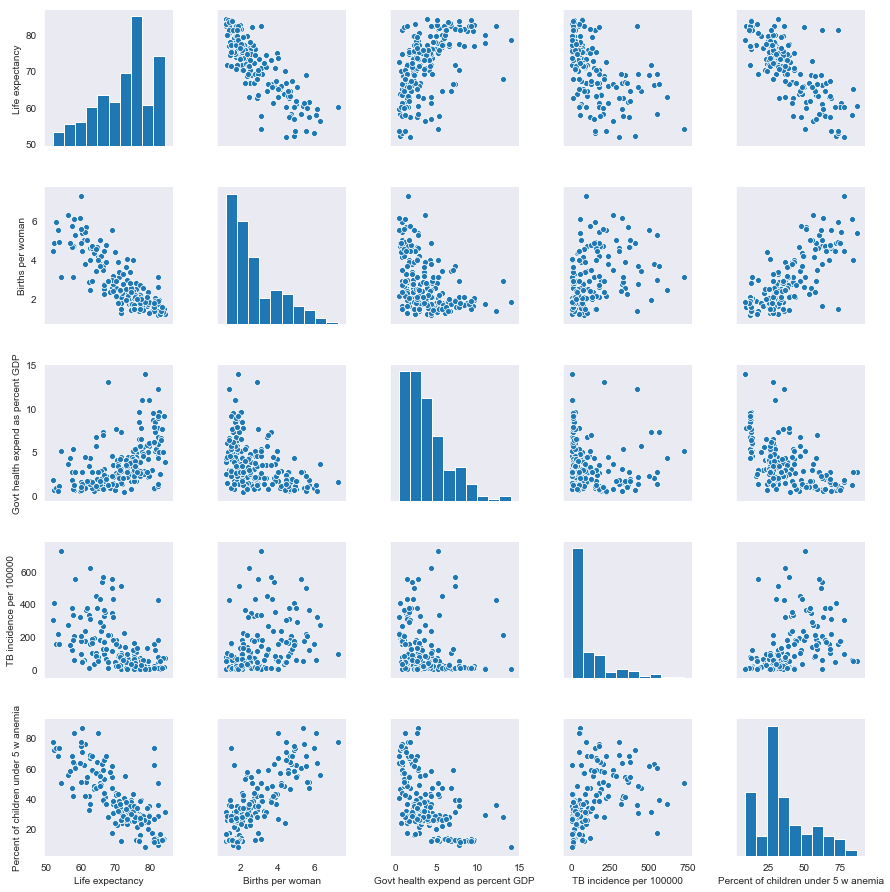

In [82]:
sns.pairplot(smaller_dataset)

### Zoom in on a single variable
Histograms are an easy way to dive deeper into understanding a single variable. A histogram separates the data into bins (packages like [seaborn](https://seaborn.pydata.org/) do a pretty good job of guessing the number of bins for you, although you can always override this manually). The `displot()` function in seaborn also allows you to easily fit a kernel density estimate (KDE) to a histogram. 

Text(0.5, 1.0, 'Births per woman')

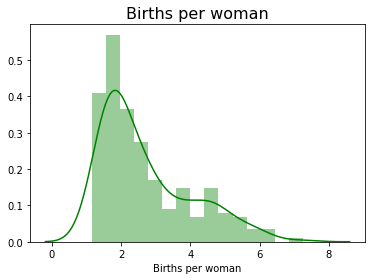

In [64]:
sns.distplot(smaller_dataset['Births per woman'], bins=15, color="g").set_title('Births per woman', size=16)

### Does a linear relationship exist? Try taking a look at correlation coefficients
Correlation coefficients (which range from -1 to 1) are a fast way to get an impression of a linear relationship. Correlation values close to zero are interpreted to mean that no relationship exists. Values close to 1 or -1 may indicate the existence of a stronger relationship. 

Given a multivariate dataset (in this case, the 'smaller_dataset' dataframe generated earlier) we can simply use the built-in `.corr()` function to obtain pariwise correlations. 

In [83]:
smaller_dataset.corr()

,Life expectancy,Births per woman,Govt health expend as percent GDP,TB incidence per 100000,Percent of children under 5 w anemia
Life expectancy,1.000000,-0.833091,0.515044,-0.592112,-0.805410
Births per woman,-0.833091,1.000000,-0.452232,0.453990,0.787321
Govt health expend as percent GDP,0.515044,-0.452232,1.000000,-0.232767,-0.565777
TB incidence per 100000,-0.592112,0.453990,-0.232767,1.000000,0.483741
Percent of children under 5 w anemia,-0.805410,0.787321,-0.565777,0.483741,1.000000


Instead of viewing the results in a plain table, it may be nicer to view the correlation coefficients using a seaborn **heatmap**:

Text(0.5, 1.0, 'Correlation Heatmap')

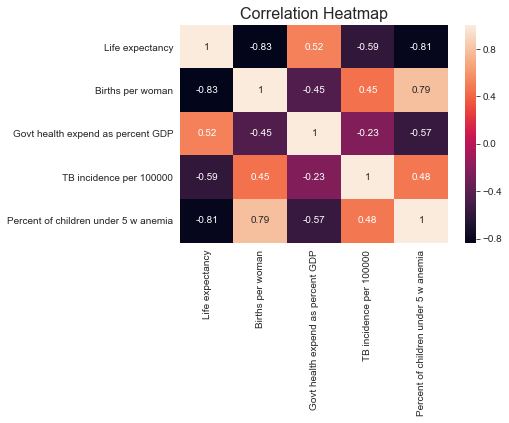

In [84]:
sns.heatmap(smaller_dataset.corr(),annot=True).set_title('Correlation Heatmap', size=16)

## Step 2. divide into attributes and labels
Once you have prepared the data, the second step is to divide it into “attributes” and “labels”. 
- Attributes == Independent variables == features == input 
- Labels == Dependent variables == response to be predicted

For this example, we will use a few different attributes - including birth rate and GNI - to try and predict the label  Life Expectancy.

In [94]:
multivariate_X = smaller_dataset[['Births per woman', 
                     #'GNI per cap USD', 
                     'Govt health expend as percent GDP', 
                     #'TB incidence per 100000', 
                     'Percent of children under 5 w anemia']].values
multivariate_y = smaller_dataset['Life expectancy'].values

check the average value of the life expectancy

Text(0.5, 1.0, 'Life Expectancy')

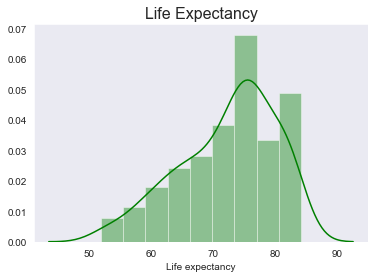

In [93]:
plt.figure(figsize=(6,4))
plt.tight_layout()
seabornInstance.distplot(smaller_dataset['Life expectancy'], color="g").set_title('Life Expectancy', size=16)

## Step 3. Split into 80% train and 20% test data
Train Test Split
- This is very easy to do with sklearn (make sure you understand the mathematics behind this though!)

In [95]:
## split into test and train data
X_train, X_test, y_train, y_test = train_test_split(multivariate_X, multivariate_y, test_size=0.2, random_state=0)

## Step 4. Fit model on the training data
Training the Linear Regression Model

In [96]:
# train model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Step 5. See how well it performed

Predictions from the model
As said earlier, in the case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen, execute the following script:

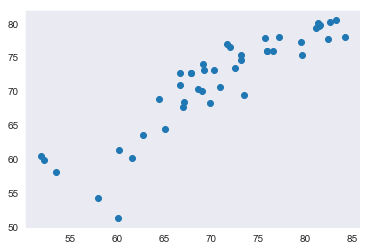

In [97]:
predictions = regressor.predict(X_test)
plt.scatter(y_test,predictions)

A pretty good job has been done, a linear model has been obtained!

In [112]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

X2 = smaller_dataset[['Births per woman',  'Govt health expend as percent GDP', 'Percent of children under 5 w anemia']]

coeff_df = pd.DataFrame(regressor.coef_, X2.columns, columns=['Coefficient'])  
print(coeff_df)

print("   thus, for one unit increase in Life Expectancy, there is a reduction in births per woman of", regressor.coef_[0])

86.11252823938997
[-3.28434116  0.10693775 -0.14416532]
                                      Coefficient
Births per woman                        -3.284341
Govt health expend as percent GDP        0.106938
Percent of children under 5 w anemia    -0.144165
   thus, for one unit increase in Life Expectancy, there is a reduction in births per woman of -3.284341157529605


In [113]:
y_pred = regressor.predict(X_test)

In [115]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred1 = df_pred.head(25)
df_pred1.head()

,Actual,Predicted
0,67.83500,72.707517
1,52.17100,59.823645
2,71.65122,76.941488
3,51.83500,60.527758
4,67.03200,67.712058


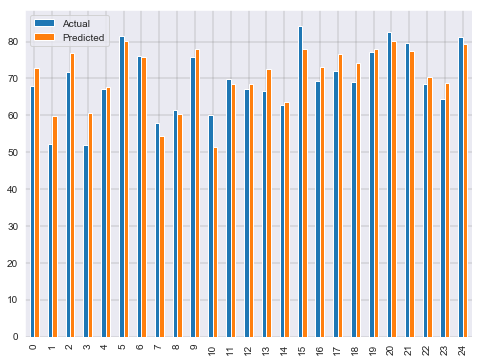

In [117]:
df_pred1.plot(kind='bar',figsize=(8,6))
plt.grid(which='major', linestyle='-', linewidth='0.35', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.35', color='black')
plt.show()

Our model has returned predictions that are pretty close to the actual results. But how good was the model?

The final step is to evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE. 

In [130]:
print('The MAE is:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('The MSE is:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('The RMSE is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))
print('   Since the mean is', np.mean(y_test).round(3), 'your RMSE should probably be below', 0.1*np.mean(y_test).round(3))

The MAE is: 3.0
The MSE is: 14.055
The RMSE is: 3.749
   Since the mean is 70.776 your RMSE should probably be below 7.0776


One rule of thumb is to keep your RMSE below 10% of the mean. 


# Stats stuff
Select only the important variables for the model.

Scikit-learn is a good way to plot a linear regression but if we are considering linear regression for modelling purposes then we need to know the importance of variables( significance) with respect to the hypothesis.

To do this, we need to calculate the p value for each variable and if it is less than the desired cutoff( 0.05 is the general cut off for 95% significance) then we can say with confidence that a variable is significant. We can calculate the p-value using another library called ‘statsmodels’.

In [192]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#### OLS
- Ordinary least squares or linear least squares is a method for estimating the unknown parameters in a linear regression model.
- We can drop few variables and select only those that have p values < 0.5 and then we can check improvement in the model

In [195]:
model1=sm.OLS(y_train,X_train)
result=model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     433.2
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           5.39e-94
Time:                        08:09:09   Log-Likelihood:                -760.50
No. Observations:                 173   AIC:                             1531.
Df Residuals:                     168   BIC:                             1547.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1355      1.997      0.569      0.570      -2.806       5.077
x2             0.0005      0.000      4.692      0.000       0.000       0.001
x3             6.2493      0.609     10.260      0.000       5.047       7.452
x4            -0.0339      0.013     -2.640      0.009      -0.059      -0.009
x5             1.0673      0.142      7.499      0.000       0.786       1.348
==============================================================================
Omnibus:                       17.472   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.570
Skew:                          -0.793   Prob(JB):                     5.63e-05
Kurtosis:                       3.446   Cond. No.                     3.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Dealing with multicollinearity
- when fitting a model, you may find that some of your independent variables in the regression are highly related to each other. Becuase of this, they do not provide unique/independent information. This is known as multicollinearity

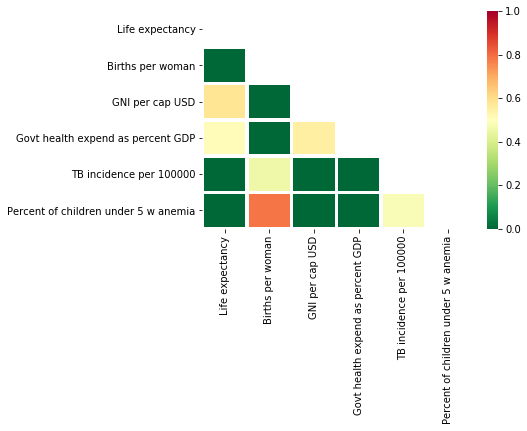

In [199]:
cor_df=smaller_dataset.corr(method='pearson')
mask= np.zeros_like(cor_df)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(cor_df, cmap='RdYlGn_r', vmax=1.0, 
            vmin=0,mask=mask, linewidths=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# References
https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f 
https://www.edvancer.in/step-step-guide-to-execute-linear-regression-python/

# Extra Plotting Exercises
To get an idea of our data

## Scatter Plot

In [131]:
# #Extra plot (scatter)
# df1.plot(x='TB incidence per 100000', y='Percent of children under 5 w anemia', style='o')  
# plt.title('TB Incidence vs Anemia in Children ')  
# plt.xlabel('TB incidence per 100000')  
# plt.ylabel('Percent of children under 5 w anemia ')  
# plt.show()

## Histogram

Text(0, 0.5, 'Frequency')

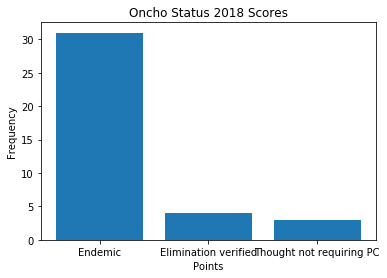

In [73]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = df1['Oncho Status 2018'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Oncho Status 2018 Scores') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

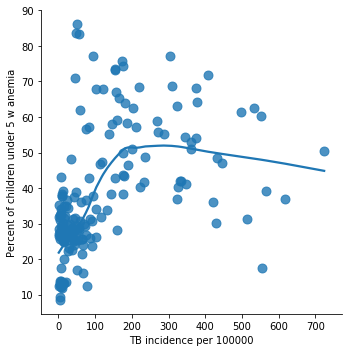

In [178]:
sns.lmplot(x='TB incidence per 100000', y='Percent of children under 5 w anemia', data=df1,
#            order=3, 
#            robust=True, 
#            logistic=True,
           lowess=True,
           ci=None, scatter_kws={"s": 80});

## Extra lmplot
# sns.lmplot(x='TB incidence per 100000', y='Percent of children under 5 w anemia', hue='Cut leishm status 2017',data=df1,);